In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
main_data = pd.read_csv('data.csv')
food_relationship = pd.read_csv('food_hierarchy.csv')

In [9]:
Q1 = main_data['symptom_value'].quantile(0.25)
Q3 = main_data['symptom_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
main_data1 = main_data[(main_data['symptom_value'] >= lower_bound) & (main_data['symptom_value'] <= upper_bound)]

/var/folders/vn/0pllmk4d2q7dl5gq08l8hdxc0000gn/T/ipykernel_43894/540008976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data1['symptom_value_log1p'] = np.log1p(main_data1['symptom_value'])


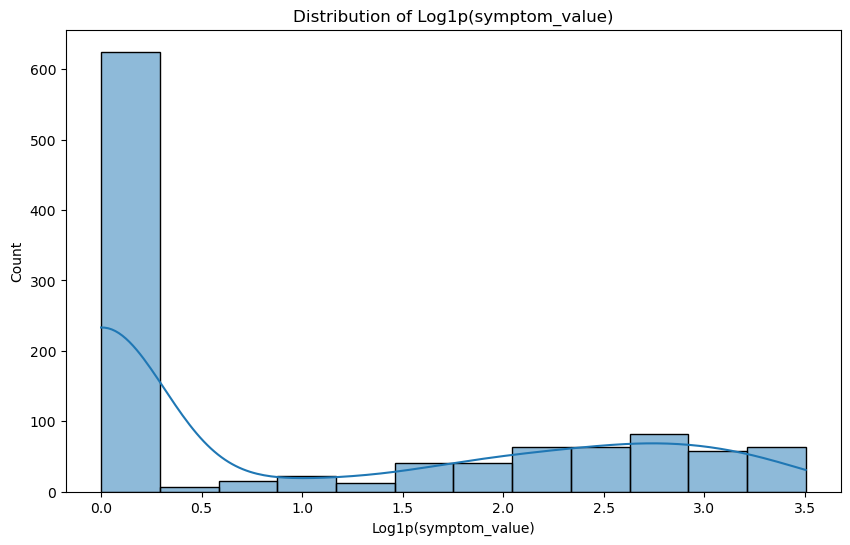

In [10]:
main_data1['symptom_value_log1p'] = np.log1p(main_data1['symptom_value'])

# Check the distribution of the transformed target variable using a histogram or kernel density plot
plt.figure(figsize=(10, 6))
sns.histplot(main_data1['symptom_value_log1p'], kde=True)
plt.xlabel('Log1p(symptom_value)')
plt.title('Distribution of Log1p(symptom_value)')
plt.show()

In [11]:
X = main_data1.drop(columns=['symptom_value_log1p'])
y = main_data1['symptom_value_log1p']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [15]:
models = {'Linear Regression': lr, 'KNN': knn, 'XGBoost': xgb}

for name, model in models.items():
    if name == 'KNN':
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R^2 Score: {r2:.4f}")


Linear Regression R^2 Score: 0.8618
KNN R^2 Score: 0.5837
XGBoost R^2 Score: 0.9998
